<a href="https://colab.research.google.com/github/LuisSeabra/MVP_analise_dados/blob/main/C%C3%B3pia_de_membros_PIB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.metrics import accuracy_score # para a exibição da acurácia do modelo
from sklearn.neighbors import KNeighborsClassifier # algoritmo KNN
from sklearn.tree import DecisionTreeClassifier # algoritmo Árvore de Classificação
from sklearn.naive_bayes import GaussianNB # algoritmo Naive Bayes
from sklearn.svm import SVC # algoritmo SVM

In [5]:
import chardet

# Detectar a codificação do arquivo
with open("membros_FINAL.csv", 'rb') as f:
    result = chardet.detect(f.read())
    print(result)  # Mostra a codificação e a confiança


{'encoding': 'ISO-8859-1', 'confidence': 0.7288868000645473, 'language': ''}


In [6]:
import pandas as pd

# Tentar carregar o arquivo, ignorando as linhas problemáticas
membros_data = pd.read_csv("membros_FINAL.csv", encoding='latin1', sep=',', on_bad_lines='skip')

# Verificar as primeiras linhas do arquivo
print(membros_data.head())


  Nome;NASC;IDADE;ESTADO_CIVIL;MODO_ENT;ENDERECO;EBD
0  ANDREA ALBUQUERQUE DE MOURA PINTO;13/11/1970NA...
1  ARLETE DE MEDEIROS SILVA;11/05/1946;78;VIUVO;A...
2  BENY LADEIRA TEIXEIRA;14/12/1943;80;VIUVO;ACLA...
3  EDVALDO BELO PEREIRA;07/09/1960;64;CASADO;ACLA...
4  ELIANE MARIA DOS REIS PACHECO;11/12/1962;61;CA...


In [7]:
import pandas as pd
import csv

# Função para limpar o arquivo CSV
def clean_csv(input_file, output_file):
    with open(input_file, 'r', encoding='latin1') as infile, open(output_file, 'w', newline='', encoding='utf-8') as outfile:
        reader = csv.reader(infile)
        writer = csv.writer(outfile)

        # Identifica a quantidade correta de colunas pela primeira linha (cabeçalho)
        headers = next(reader)
        writer.writerow(headers)
        num_columns = len(headers)

        # Lê e limpa as demais linhas
        for row in reader:
            if len(row) == num_columns:  # Mantém apenas linhas com o número correto de colunas
                writer.writerow(row)
            else:
                # Pode implementar lógica adicional para tratar as linhas problemáticas
                print(f"Linha problemática ignorada: {row}")

# Caminho do arquivo de entrada e de saída
input_file = 'membros_FINAL.csv'  # Nome do arquivo CSV original
output_file = 'membros_FINAL_cleaned.csv'  # Nome do arquivo CSV limpo

# Limpar o arquivo
clean_csv(input_file, output_file)

# Carregar o arquivo limpo no pandas
membros_data_cleaned = pd.read_csv(output_file, encoding='utf-8')

# Verificar as primeiras linhas do arquivo limpo
print(membros_data_cleaned.head())


  Nome;NASC;IDADE;ESTADO_CIVIL;MODO_ENT;ENDERECO;EBD
0  ANDREA ALBUQUERQUE DE MOURA PINTO;13/11/1970NA...
1  ARLETE DE MEDEIROS SILVA;11/05/1946;78;VIUVO;A...
2  BENY LADEIRA TEIXEIRA;14/12/1943;80;VIUVO;ACLA...
3  EDVALDO BELO PEREIRA;07/09/1960;64;CASADO;ACLA...
4  ELIANE MARIA DOS REIS PACHECO;11/12/1962;61;CA...


In [8]:
import pandas as pd

# Suponha que o caminho seja 'C:/caminho/para/membros_FINAL_cleaned.csv'
df_membros = pd.read_csv('/content/membros_FINAL_cleaned.csv')


In [9]:
import pandas as pd

# Carregar o arquivo CSV em um DataFrame
df_membros = pd.read_csv('membros_FINAL_cleaned.csv')

# Exibir as primeiras linhas do DataFrame
print(df_membros.head())


  Nome;NASC;IDADE;ESTADO_CIVIL;MODO_ENT;ENDERECO;EBD
0  ANDREA ALBUQUERQUE DE MOURA PINTO;13/11/1970NA...
1  ARLETE DE MEDEIROS SILVA;11/05/1946;78;VIUVO;A...
2  BENY LADEIRA TEIXEIRA;14/12/1943;80;VIUVO;ACLA...
3  EDVALDO BELO PEREIRA;07/09/1960;64;CASADO;ACLA...
4  ELIANE MARIA DOS REIS PACHECO;11/12/1962;61;CA...


In [10]:
# Exibir as primeiras 5 linhas do DataFrame
print(df_membros.head())


  Nome;NASC;IDADE;ESTADO_CIVIL;MODO_ENT;ENDERECO;EBD
0  ANDREA ALBUQUERQUE DE MOURA PINTO;13/11/1970NA...
1  ARLETE DE MEDEIROS SILVA;11/05/1946;78;VIUVO;A...
2  BENY LADEIRA TEIXEIRA;14/12/1943;80;VIUVO;ACLA...
3  EDVALDO BELO PEREIRA;07/09/1960;64;CASADO;ACLA...
4  ELIANE MARIA DOS REIS PACHECO;11/12/1962;61;CA...


In [11]:
print(df_membros.columns)


Index(['Nome;NASC;IDADE;ESTADO_CIVIL;MODO_ENT;ENDERECO;EBD'], dtype='object')


In [12]:
# Remover espaços em branco dos nomes das colunas
df_membros.columns = df_membros.columns.str.strip()

# Tentar novamente com o nome corrigido
print(df_membros.columns)


Index(['Nome;NASC;IDADE;ESTADO_CIVIL;MODO_ENT;ENDERECO;EBD'], dtype='object')


In [13]:
# Remover espaços em branco ou caracteres extras dos nomes das colunas
df_membros.columns = df_membros.columns.str.strip()

# Listar colunas novamente
print(df_membros.columns)


Index(['Nome;NASC;IDADE;ESTADO_CIVIL;MODO_ENT;ENDERECO;EBD'], dtype='object')


In [14]:
# Listar todas as colunas do DataFrame
print(df_membros.columns)


Index(['Nome;NASC;IDADE;ESTADO_CIVIL;MODO_ENT;ENDERECO;EBD'], dtype='object')


In [15]:
# Remover espaços em branco dos nomes das colunas
df_membros.columns = df_membros.columns.str.strip()


In [ ]:
# Verificar se a coluna MODO_ENT realmente existe
if 'MODO_ENT' in df_membros.columns:
    print("A coluna MODO_ENT existe.")
    print(df_membros['MODO_ENT'].head())  # Exibir as primeiras linhas da coluna
else:
    print("A coluna MODO_ENT não existe.")


A coluna MODO_ENT não existe.


In [17]:
# Listar todas as colunas do DataFrame
print(df_membros.columns)


Index(['Nome;NASC;IDADE;ESTADO_CIVIL;MODO_ENT;ENDERECO;EBD'], dtype='object')


In [18]:
import pandas as pd

# Ler o arquivo novamente, especificando o delimitador
df_membros = pd.read_csv('membros_FINAL_cleaned.csv', sep=';')

# Verificar as colunas novamente
print(df_membros.columns)


Index(['Nome', 'NASC', 'IDADE', 'ESTADO_CIVIL', 'MODO_ENT', 'ENDERECO', 'EBD'], dtype='object')


In [19]:
# Exibir as primeiras 5 linhas da coluna MODO_ENT
print(df_membros['MODO_ENT'].head())


0    ACLAMACAO
1    ACLAMACAO
2    ACLAMACAO
3    ACLAMACAO
4    ACLAMACAO
Name: MODO_ENT, dtype: object


In [20]:
# Listar todas as colunas do DataFrame
print(df_membros.columns)


Index(['Nome', 'NASC', 'IDADE', 'ESTADO_CIVIL', 'MODO_ENT', 'ENDERECO', 'EBD'], dtype='object')


In [ ]:
# Contar a frequência de cada valor na coluna 'MODO_ENT'
modo_ent_contagem = df_membros['MODO_ENT'].value_counts()


In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o arquivo CSV em um DataFrame
df_membros = pd.read_csv('membros_FINAL_cleaned.csv')

# Verificar as primeiras linhas para garantir que o arquivo foi carregado corretamente
print(df_membros.head())

# Verificar a distribuição da coluna MODO_ENT
modo_ent_contagem = df_membros['MODO_ENT'].value_counts()

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
modo_ent_contagem.plot(kind='bar', color='skyblue')

# Adicionar título e rótulos
plt.title('Distribuição da Coluna MODO_ENT')
plt.xlabel('Modo de Entrada')
plt.ylabel('Frequência')

# Exibir o gráfico
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x, se necessário
plt.tight_layout()  # Ajustar o layout para evitar sobreposição
plt.show()


  Nome;NASC;IDADE;ESTADO_CIVIL;MODO_ENT;ENDERECO;EBD
0  ANDREA ALBUQUERQUE DE MOURA PINTO;13/11/1970NA...
1  ARLETE DE MEDEIROS SILVA;11/05/1946;78;VIUVO;A...
2  BENY LADEIRA TEIXEIRA;14/12/1943;80;VIUVO;ACLA...
3  EDVALDO BELO PEREIRA;07/09/1960;64;CASADO;ACLA...
4  ELIANE MARIA DOS REIS PACHECO;11/12/1962;61;CA...


KeyError: 'MODO_ENT'

In [23]:
print(df_membros.columns)


Index(['Nome;NASC;IDADE;ESTADO_CIVIL;MODO_ENT;ENDERECO;EBD'], dtype='object')


In [24]:
df_membros.columns = df_membros.columns.str.strip()


In [27]:
# Listar os nomes das colunas para garantir que 'MODO_ENT' está presente
print(df_membros.columns)


Index(['Nome;NASC;IDADE;ESTADO_CIVIL;MODO_ENT;ENDERECO;EBD'], dtype='object')


In [36]:
# Tentar carregar o arquivo com uma codificação diferente
df_membros = pd.read_csv('membros_FINAL_cleaned.csv', encoding='utf-8')


In [37]:
# Tentar carregar o arquivo com uma codificação diferente
df_membros = pd.read_csv('membros_FINAL_cleaned.csv', encoding='utf-8')


In [39]:
# Especificar o separador como ponto e vírgula (;) se necessário
df_membros = pd.read_csv('membros_FINAL_cleaned.csv', sep=',')


In [40]:
# Limpar espaços extras nos nomes das colunas
df_membros.columns = df_membros.columns.str.strip()


In [41]:
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
# Carregar o arquivo CSV
df_membros = pd.read_csv('membros_FINAL_cleaned.csv', encoding='utf-8')

In [43]:
# Verificar os nomes das colunas
print(df_membros.columns)

Index(['Nome;NASC;IDADE;ESTADO_CIVIL;MODO_ENT;ENDERECO;EBD'], dtype='object')


In [48]:
# Limpar espaços extras nos nomes das colunas, se necessário
df_membros.columns = df_membros.columns.str.strip()

In [49]:
df = pd.read_csv('/content/membros_FINAL_cleaned.csv')


In [53]:
import pandas as pd

# Carregando o DataFrame com o delimitador correto
df = pd.read_csv('/content/membros_FINAL_cleaned.csv', delimiter=';')

# Verificando as colunas
print(df.columns)


Index(['Nome', 'NASC', 'IDADE', 'ESTADO_CIVIL', 'MODO_ENT', 'ENDERECO', 'EBD'], dtype='object')


In [54]:
print(df.columns)


Index(['Nome', 'NASC', 'IDADE', 'ESTADO_CIVIL', 'MODO_ENT', 'ENDERECO', 'EBD'], dtype='object')


In [55]:
# Remover espaços em branco nos nomes das colunas
df.columns = df.columns.str.strip()


Index(['Nome', 'NASC', 'IDADE', 'ESTADO_CIVIL', 'MODO_ENT', 'ENDERECO', 'EBD'], dtype='object')


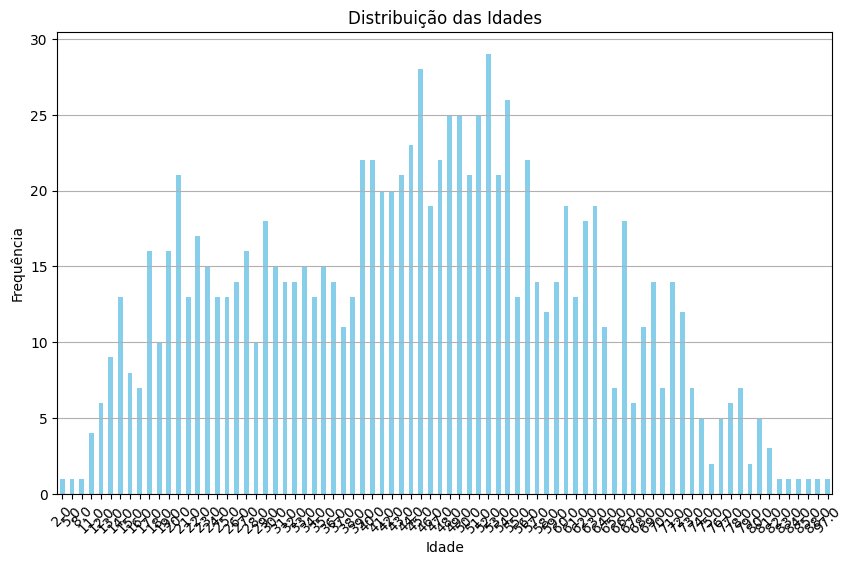

In [56]:
import matplotlib.pyplot as plt

# Verificando se a coluna IDADE agora existe
print(df.columns)

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
df['IDADE'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribuição das Idades')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x
plt.grid(axis='y')

plt.show()


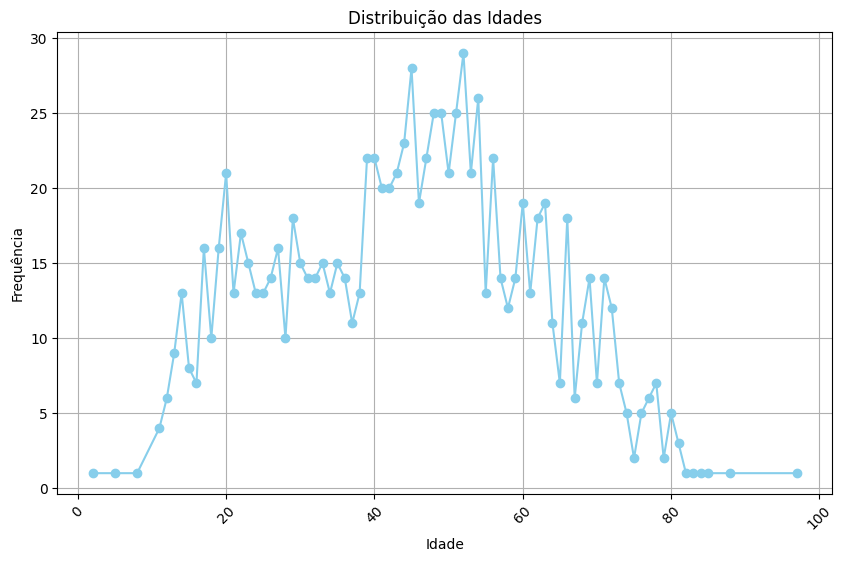

In [57]:
# Contar a frequência das idades
idade_counts = df['IDADE'].value_counts().sort_index()

# Plotando o gráfico de linhas
plt.figure(figsize=(10, 6))
plt.plot(idade_counts.index, idade_counts.values, marker='o', color='skyblue')
plt.title('Distribuição das Idades')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x
plt.grid()

plt.show()


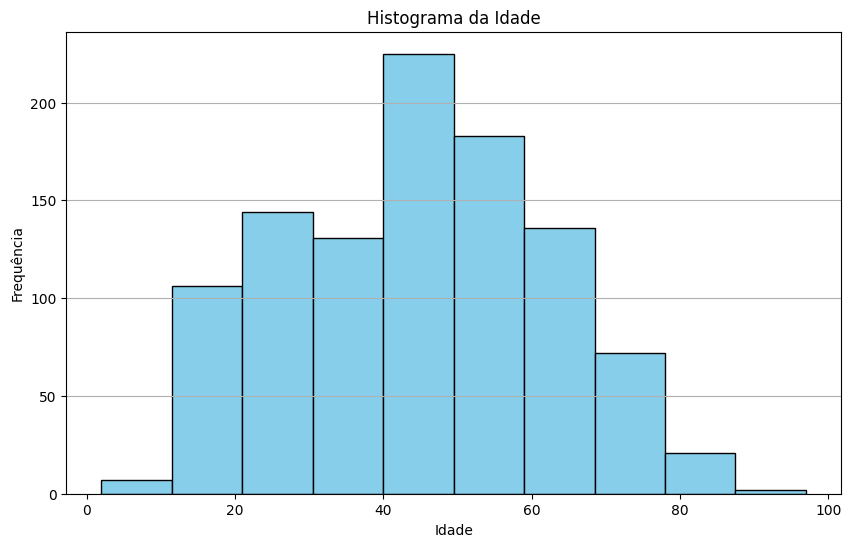

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregando o DataFrame com o delimitador correto
df = pd.read_csv('/content/membros_FINAL_cleaned.csv', delimiter=';')

# Remover espaços em branco nos nomes das colunas
df.columns = df.columns.str.strip()

# Plotando o histograma
plt.figure(figsize=(10, 6))
plt.hist(df['IDADE'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histograma da Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(axis='y')

plt.show()


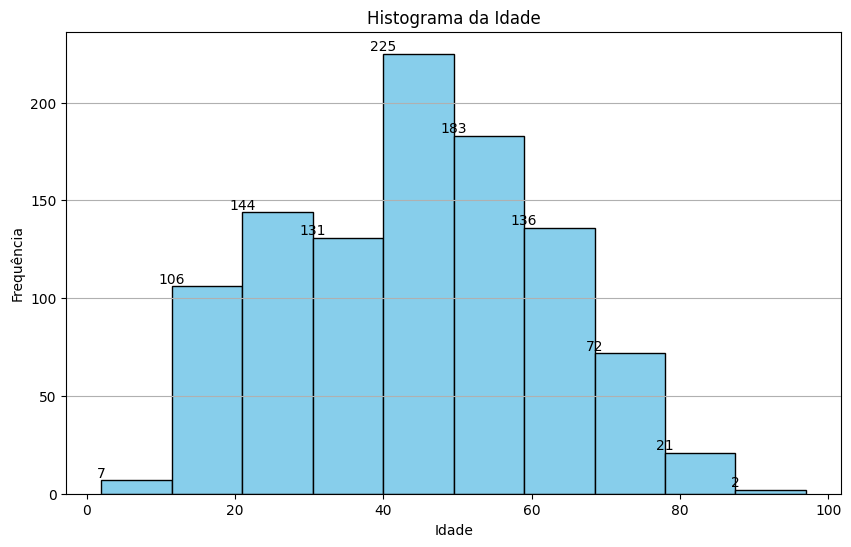

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregando o DataFrame com o delimitador correto
df = pd.read_csv('/content/membros_FINAL_cleaned.csv', delimiter=';')

# Remover espaços em branco nos nomes das colunas
df.columns = df.columns.str.strip()

# Plotando o histograma
plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(df['IDADE'], bins=10, color='skyblue', edgecolor='black')

# Adicionando rótulos acima das barras
for count, x in zip(counts, bins):
    plt.text(x, count, str(int(count)), ha='center', va='bottom')

plt.title('Histograma da Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(axis='y')

plt.show()
